In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
import warnings 
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import TweetTokenizer
import time
import re
import os
import csv
import random
from collections import Counter
from nltk.tokenize import regexp_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings 

warnings.filterwarnings(action = 'ignore') 

In [2]:
def load_data():
    data_list = []
    directory = "./russian-troll-tweets-master/"
    outF = open("tweets_english.txt", "a")
    for root,dirs,files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                data = pd.read_csv(directory+file)
                for index, row in data.iterrows():
                    if ((str(row['language'])).lower()=='english'):
                        outF.write(str(row['content']))
                        outF.write("\n")
                        data_list.append([row['author'],row['content'],row['publish_date']])
    df = pd.DataFrame.from_records(data_list, columns=['author', 'content', 'publish_date'])
    df.to_csv (r'./df_tweets.csv', index = None, header=True)
    return df

In [3]:
#df = load_data() - only on first run

In [4]:
def load_lines():
    filepath = 'tweets.txt'
    with open(filepath) as fp:
        for cnt, line in enumerate(fp):
            wordh = regexp_tokenize(line.lower(), r'([#|@]\w+)')
            if (len(wordh)>0):
                for word in wordh:
                    if '#' in word:
                        word_list_h.append(word)
                    else:
                        word_list_m.append(word)
            yield gensim.utils.simple_preprocess (line)      

In [5]:
word_list_h = []
word_list_m = []
    
def load_df():
        path = "./df_tweets.csv"
        df = pd.read_csv(path)
        return df

def get_stats(line):
    wordh = regexp_tokenize(line.lower(), r'([#|@]\w+)')
    if (len(wordh)>0):
        for word in wordh:
            if '#' in word:
                word_list_h.append(word)
            else:
                word_list_m.append(word)
   
    
def clean_data(df):
    for index, row in df.iterrows():
        line = str(row['content']) 
        get_stats(line)
        yield gensim.utils.simple_preprocess (line)

In [6]:
start_time = time.time()

In [7]:
%%time
df = load_df()

CPU times: user 4.09 s, sys: 297 ms, total: 4.39 s
Wall time: 4.46 s


In [8]:
%%time
document = list(clean_data(df))

CPU times: user 4min 18s, sys: 1.69 s, total: 4min 20s
Wall time: 4min 21s


In [9]:
#document = list(load_lines())
#len(document)

In [10]:
len(document)

2116867

In [11]:
len(word_list_h)

1457397

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]), <a list of 8 Text xticklabel objects>)

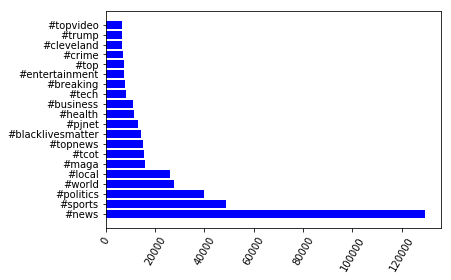

In [12]:
summary = Counter(word_list_h)
dh = dict(summary.most_common(20))
y_pos = np.arange(len(dh.keys()))
x_pos = list(dh.values())
fig, ax = plt.subplots()
ax.barh(y_pos, x_pos, color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(dh.keys())
plt.xticks(rotation=60)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]), <a list of 9 Text xticklabel objects>)

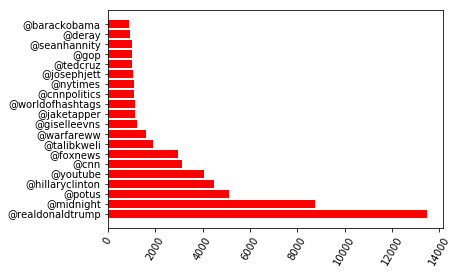

In [13]:
summary_m = Counter(word_list_m)
dm = dict(summary_m.most_common(20))
y_pos = np.arange(len(dm.keys()))
x_pos = list(dm.values())
fig, ax = plt.subplots()
ax.barh(y_pos, x_pos, color='red')
ax.set_yticks(y_pos)
ax.set_yticklabels(dm.keys())
plt.xticks(rotation=60)

In [52]:
print (df.shape)
df.head()

(2116867, 6)


,author,content,publish_date,Year,month,week
0,DAILYSANFRAN,Police: Airline pilot found passed out in cock...,2017-01-02 14:39:00,2017,1,1
1,DAILYSANFRAN,Dashcam video shows man launching himself onto...,2017-01-02 15:39:00,2017,1,1
2,DAILYSANFRAN,Man Arrested For Setting Fire To South SF Medi...,2017-01-02 16:19:00,2017,1,1
3,DAILYSANFRAN,Practical tips to achieving your New Year's re...,2017-01-02 16:29:00,2017,1,1
4,DAILYSANFRAN,Couple disappears during trip to Big Sur https...,2017-01-02 16:39:00,2017,1,1


In [15]:
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%m/%d/%Y %H:%M')
df['Year']  = df['publish_date'].dt.year
df['month'] = df['publish_date'].dt.month
df['week']  = df['publish_date'].dt.week

In [16]:
df.head()

,author,content,publish_date,Year,month,week
0,DAILYSANFRAN,Police: Airline pilot found passed out in cock...,2017-01-02 14:39:00,2017,1,1
1,DAILYSANFRAN,Dashcam video shows man launching himself onto...,2017-01-02 15:39:00,2017,1,1
2,DAILYSANFRAN,Man Arrested For Setting Fire To South SF Medi...,2017-01-02 16:19:00,2017,1,1
3,DAILYSANFRAN,Practical tips to achieving your New Year's re...,2017-01-02 16:29:00,2017,1,1
4,DAILYSANFRAN,Couple disappears during trip to Big Sur https...,2017-01-02 16:39:00,2017,1,1


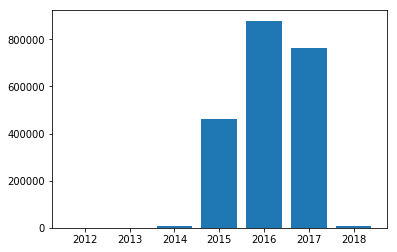

In [17]:
df_by_year = df.groupby('Year').agg('size').reset_index()
df_by_year.columns = ['Year','tweets']
plt.bar(df_by_year.Year, df_by_year.tweets)
plt.show()

In [18]:
df_2016 = df[df['publish_date'].dt.year == 2016]
print(df_2016.shape)
df_2016.head()

(878878, 6)


,author,content,publish_date,Year,month,week
31,DAILYSANFRAN,Homeowner chases suspected prowler off his pro...,2016-01-20 00:11:00,2016,1,3
32,DAILYSANFRAN,CHP: 480 reported collisions from midnight unt...,2016-01-20 00:20:00,2016,1,3
33,DAILYSANFRAN,Coroner identifies 19-year-old woman killed in...,2016-01-20 00:27:00,2016,1,3
34,DAILYSANFRAN,Report: Strong possibility defensive coordinat...,2016-01-20 00:29:00,2016,1,3
35,DAILYSANFRAN,Taliban kill 20 in attack at northwest Pakista...,2016-01-20 12:14:00,2016,1,3


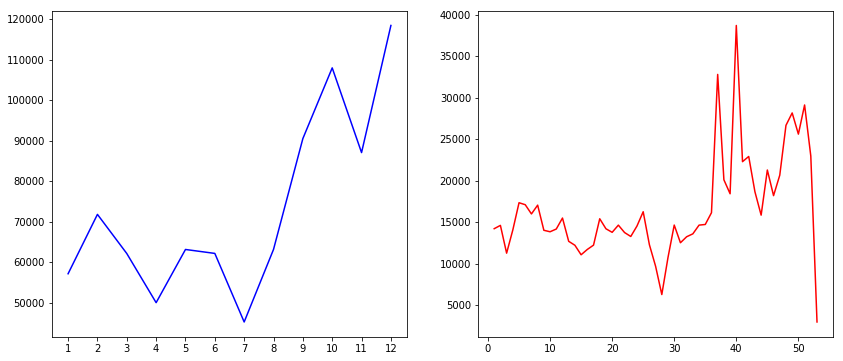

In [19]:
df_2016_month_sum = df_2016.groupby('month').agg('size').reset_index()
df_2016_month_sum.columns = ['month','tweets']
df_2016_week_sum = df_2016.groupby('week').agg('size').reset_index()
df_2016_week_sum.columns = ['week','tweets']
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
ax1.plot(df_2016_month_sum.month, df_2016_month_sum.tweets, c = 'b')
ax2.plot(df_2016_week_sum.week, df_2016_week_sum.tweets, c = 'r')
ax1.set_xticks(df_2016_month_sum.month)
plt.show()

In [20]:
df_2016_nov = df[df['month']==12]
df_2016_nov['day']  = df['publish_date'].dt.day
print(df_2016_nov.shape)
df_2016_nov.head()

(190634, 7)


,author,content,publish_date,Year,month,week,day
4165,DAILYSANFRAN,Zillow values Santa's North Pole house at over...,2016-12-01 10:20:00,2016,12,48,1
4166,DAILYSANFRAN,Jury orders Wyndham Worldwide to pay $20 milli...,2016-12-01 11:20:00,2016,12,48,1
4167,DAILYSANFRAN,Santa Clara escapee Rogelio Chavez captured in...,2016-12-01 12:20:00,2016,12,48,1
4168,DAILYSANFRAN,Tacoma police officer shot multiple times dies...,2016-12-01 13:02:00,2016,12,48,1
4169,DAILYSANFRAN,Watch this adorable dog experience her first s...,2016-12-01 13:20:00,2016,12,48,1


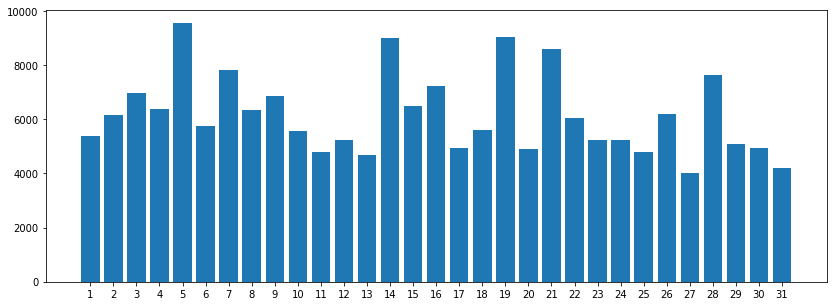

In [21]:
df_2016_nov_day = df_2016_nov.groupby('day').agg('size').reset_index()
df_2016_nov_day.columns = ['day','tweets']
plt.figure(figsize=(14,5))
plt.bar(df_2016_nov_day.day, df_2016_nov_day.tweets)
plt.xticks(df_2016_nov_day.day)
plt.show()

In [22]:
tweets = []
mention = []
trump = dict()
all_t = dict()
for index, row in df_2016_nov.iterrows():
    line = str(row['content'])
    day = row['day']
    wordh = regexp_tokenize(line.lower(), r'([#|@]\w+)')
    if (len(wordh)>0):
        for word in wordh:
            if '#' in word:
                tweets.append(word)
            else:
                mention.append(word)
            if (day in all_t):
                all_t[day] += 1
            else:
                all_t[day] = 1
            if "trump" in word:
                if (day in trump):
                    trump[day] +=1
                else:
                    trump[day] = 1
                

In [23]:
len(tweets)

137482

In [24]:
len(mention)

63510

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text xticklabel objects>)

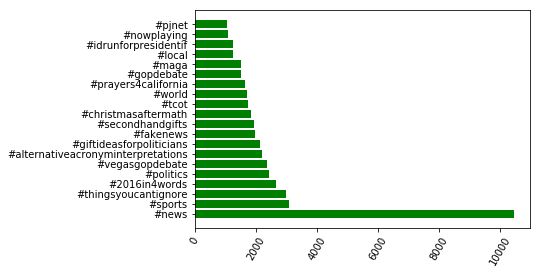

In [25]:
tweets_sum = Counter(tweets)
dh = dict(tweets_sum.most_common(20))
y_pos = np.arange(len(dh.keys()))
x_pos = list(dh.values())
fig, ax = plt.subplots()
ax.barh(y_pos, x_pos, color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(dh.keys())
plt.xticks(rotation=60)

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]), <a list of 10 Text xticklabel objects>)

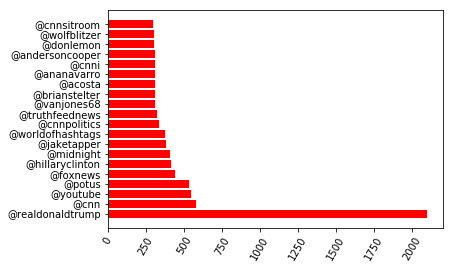

In [26]:
tweets_sum = Counter(mention)
dh = dict(tweets_sum.most_common(20))
y_pos = np.arange(len(dh.keys()))
x_pos = list(dh.values())
fig, ax = plt.subplots()
ax.barh(y_pos, x_pos, color='red')
ax.set_yticks(y_pos)
ax.set_yticklabels(dh.keys())
plt.xticks(rotation=60)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text xticklabel objects>)

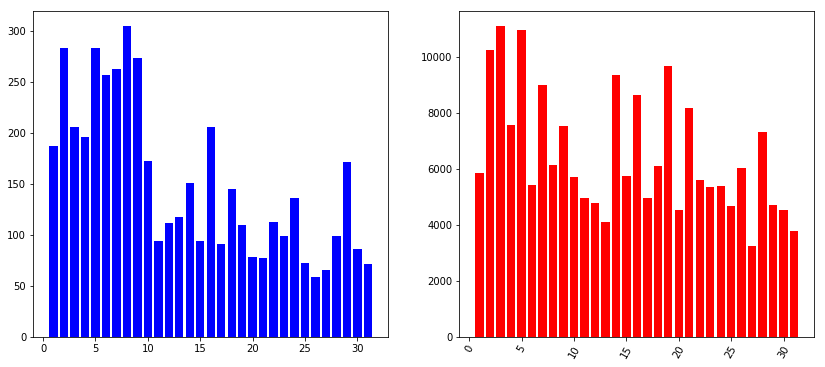

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
ax1.bar(trump.keys(), trump.values(), color='blue')
ax2.bar(all_t.keys(), all_t.values(), color='red')
plt.xticks(rotation=60)

In [28]:
%%time
model = gensim.models.Word2Vec (document, size=100, window=10, min_count=2, workers=10)
model.save("word2vec.model")

CPU times: user 8min 2s, sys: 4.41 s, total: 8min 6s
Wall time: 2min 15s


In [29]:
%%time
model = Word2Vec.load("word2vec.model")
model.train(document,total_examples=len(document),epochs=10)

CPU times: user 14min 35s, sys: 5.63 s, total: 14min 41s
Wall time: 3min 30s


(237760159, 309096170)

In [30]:
print(model)

Word2Vec(vocab=415335, size=100, alpha=0.025)


In [31]:
word1 = "facebook"
word2 = "physics"
vocab1 = model.wv.most_similar (positive=[word1],topn=5)
vocab2 = model.wv.most_similar (positive=[word2],topn=5)

In [32]:
v1 = []
for item in vocab1:
    v1.append(item[0])
X1 = model[v1]

v2 = []
for item in vocab2:
    v2.append(item[0])
X2 = model[v2]

In [33]:
tsne = TSNE(n_components=2)
X1_tsne = tsne.fit_transform(X1)
X2_tsne = tsne.fit_transform(X2)

In [34]:
df1 = pd.DataFrame(X1_tsne, index=vocab1, columns=['x', 'y'])
df2 = pd.DataFrame(X2_tsne, index=vocab2, columns=['x', 'y'])

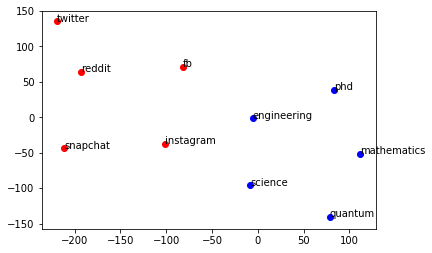

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df1['x'], df1['y'], color='red')
ax.scatter(df2['x'], df2['y'], color='blue')

for word, pos in df1.iterrows():
    ax.annotate(word[0], pos)
    
for word, pos in df2.iterrows():
    ax.annotate(word[0], pos)


In [36]:
model.wv.doesnt_match(["england","spain","russia","man","canada","mexico"])

'man'

In [37]:
model.wv.most_similar(positive=["doctor"], topn=5)

[('nurse', 0.7051630020141602),
 ('patient', 0.652767539024353),
 ('surgeon', 0.6510423421859741),
 ('patients', 0.6112216114997864),
 ('physician', 0.5900599360466003)]

In [38]:
model.wv.most_similar(positive=["nurse"], topn=5)

[('patient', 0.7205549478530884),
 ('doctor', 0.7051630616188049),
 ('woman', 0.6297337412834167),
 ('teenager', 0.6164090633392334),
 ('newborn', 0.6143915057182312)]

In [39]:
model.wv.most_similar(positive=["leader"], topn=5)

[('president', 0.6571319103240967),
 ('leadership', 0.6122977137565613),
 ('leaders', 0.5968878269195557),
 ('politician', 0.585737943649292),
 ('journalist', 0.5491124987602234)]

In [40]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.4915308356285095)]

In [41]:
model.wv.most_similar(positive=['woman','nurse'], negative=['man'], topn=1)

[('patient', 0.6464961767196655)]

In [42]:
model.wv.most_similar(positive=['woman','husband'], negative=['man'], topn=1)

[('wife', 0.7983077764511108)]

In [43]:
model.wv.most_similar(positive=['woman','boyfriend'], negative=['man'], topn=1)

[('girlfriend', 0.8000210523605347)]

In [44]:
model.wv.most_similar(positive=['fakenews'])

[('msm', 0.7159798741340637),
 ('cnn', 0.6760609149932861),
 ('fakenewsmedia', 0.6335248351097107),
 ('fake', 0.6257920861244202),
 ('propaganda', 0.6207538843154907),
 ('fakenewscnn', 0.5956898331642151),
 ('lies', 0.5925977230072021),
 ('mainstream', 0.5850728750228882),
 ('biased', 0.5848208665847778),
 ('wapo', 0.55850750207901)]

In [45]:
model.wv['trump'][:20]

array([-0.994464  ,  0.8444909 ,  6.961237  ,  0.945807  , -1.1746467 ,
       -1.4506035 ,  1.3200713 ,  0.9080915 , -0.5082928 , -3.5324092 ,
        2.9237068 , -2.4822588 , -4.0000386 ,  7.1302185 ,  3.4911509 ,
       -6.519942  , -1.2292966 ,  4.712882  ,  0.12546916, -2.5139863 ],
      dtype=float32)

In [51]:
print(model.wv.most_similar(positive=['trump', 'hillary'], negative=['man'], topn=1))

[('hrc', 0.6504697799682617)]
